# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.metrics.pairwise import cosine_similarity

# Reading the dataset

* ## Books Dataset

In [4]:
books=pd.read_csv("data/Books.csv")
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
books.loc[0]

ISBN                                                          0195153448
Book-Title                                           Classical Mythology
Book-Author                                           Mark P. O. Morford
Year-Of-Publication                                                 2002
Publisher                                        Oxford University Press
Image-URL-S            http://images.amazon.com/images/P/0195153448.0...
Image-URL-M            http://images.amazon.com/images/P/0195153448.0...
Image-URL-L            http://images.amazon.com/images/P/0195153448.0...
Name: 0, dtype: object

In [6]:
books.shape

(271360, 8)

> _In books dataset, there are 271360 books with unique ISBN_

In [7]:
books.drop(['Image-URL-S','Image-URL-M'],axis=1, inplace=True)
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [8]:
books.columns=['ISBN', 'title', 'author', 'year_of_publication', 'publisher', 'image_url']

In [9]:
books.head()

,ISBN,title,author,year_of_publication,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   title                271360 non-null  object
 2   author               271359 non-null  object
 3   year_of_publication  271360 non-null  object
 4   publisher            271358 non-null  object
 5   image_url            271357 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB


In [11]:
books.nunique()

ISBN                   271360
title                  242135
author                 102023
year_of_publication       202
publisher               16807
image_url              271041
dtype: int64

In [12]:
books.isnull().sum()

ISBN                   0
title                  0
author                 1
year_of_publication    0
publisher              2
image_url              3
dtype: int64

In [13]:
books.duplicated().sum()

0

* ## Users dataset

In [14]:
users=pd.read_csv("data/Users.csv")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [15]:
users.shape

(278858, 3)

> _In users dataset, there are 278858 users_

In [16]:
users.columns=['user_id','location','age']
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [18]:
users.isnull().sum()

user_id          0
location         0
age         110762
dtype: int64

In [19]:
users.duplicated().sum()

0

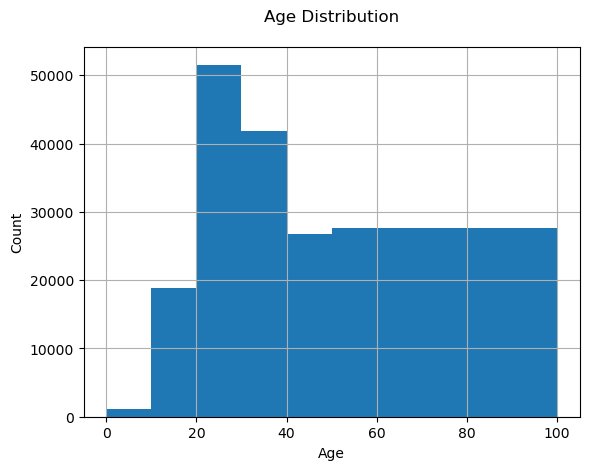

In [20]:
users.age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

* ## Ratings dataset

In [21]:
ratings=pd.read_csv("data/Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [22]:
ratings.shape

(1149780, 3)

> In ratings dataset, there are 1149780 ratings given to the books.

In [23]:
ratings.columns=['user_id','ISBN','book_rating']
ratings.head()

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [24]:
sorted(ratings.book_rating.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [25]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [26]:
ratings.isnull().sum()

user_id        0
ISBN           0
book_rating    0
dtype: int64

In [27]:
ratings.duplicated().sum()

0

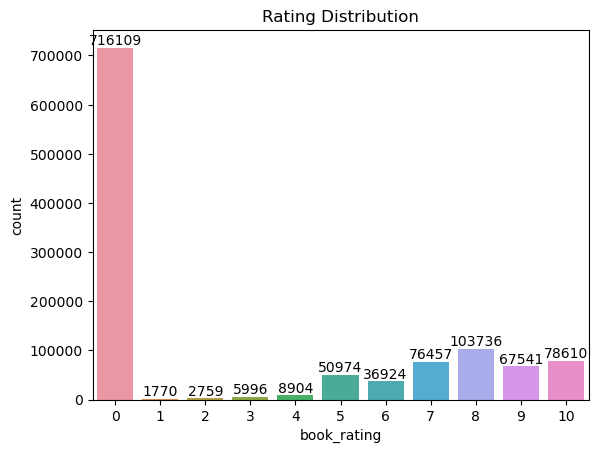

In [28]:
ax=sns.countplot(x=ratings['book_rating'])
for i in ax.containers:
    ax.bar_label(i)
plt.title('Rating Distribution')
plt.show()

In [29]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: user_id, Length: 105283, dtype: int64

In [30]:
ratings['ISBN'].value_counts()

0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: ISBN, Length: 340556, dtype: int64

# Merge the datasets

In [31]:
# users who had at least rated more than 100 or 100 books
count = ratings['book_rating'].value_counts()
ratings = ratings[ratings['book_rating'].isin(count[count >= 100].index)]

In [32]:
ratings

,user_id,ISBN,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10
1149778,276721,0590442449,10


In [33]:
ratings_with_books = ratings.merge(books, on='ISBN')
ratings_with_books.head()

,user_id,ISBN,book_rating,title,author,year_of_publication,publisher,image_url
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...


In [34]:
count_rating=ratings_with_books.groupby('title').agg(mean_rating = ('book_rating', 'mean'), no_of_ratings = ('book_rating', 'count')).reset_index()
count_rating.head()

,title,mean_rating,no_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25,4
1,Always Have Popsicles,0.00,1
2,Apple Magic (The Collector's series),0.00,1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00,1
4,Beyond IBM: Leadership Marketing and Finance ...,0.00,1


In [35]:
ratings_with_books.drop('book_rating', axis=1,inplace=True)

In [36]:
final_df=ratings_with_books.merge(count_rating, on='title')
final_df.head()

,user_id,ISBN,title,author,year_of_publication,publisher,image_url,mean_rating,no_of_ratings
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60
1,2313,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60
2,6543,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60
3,8680,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60
4,10314,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60


In [37]:
# books which got at least 50 rating of user
final_df=final_df[final_df.no_of_ratings>=50]
final_df.head()

,user_id,ISBN,title,author,year_of_publication,publisher,image_url,mean_rating,no_of_ratings
0,276725,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60
1,2313,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60
2,6543,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60
3,8680,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60
4,10314,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,2.933333,60


In [38]:
final_df.shape

(288740, 9)

In [39]:
final_df.title=[t.lower() for t in final_df.title]

In [40]:
final_df.drop_duplicates(['user_id','title'],inplace=True)

In [41]:
final_df.shape

(285424, 9)

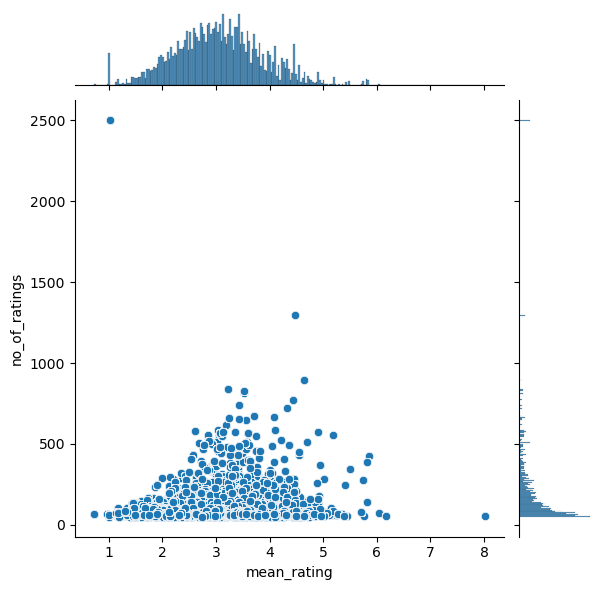

In [42]:
sns.jointplot(x='mean_rating', y='no_of_ratings', data=final_df)

# Creating the User-Item Interaction matrix

In [43]:
book_pivot = final_df.pivot_table(columns='user_id', index='title', values= 'mean_rating').fillna(0)

In [44]:
book_pivot

user_id,8,9,14,16,17,19,23,26,32,39,...,278820,278824,278828,278832,278836,278843,278844,278846,278851,278854
title,,,,,,,,,,,,,,,,,,,,,
10 lb. penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16 lighthouse road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to die: a novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: odyssey two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
you belong to me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
you shall know our velocity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
young wives,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Model

In [45]:
from scipy.sparse import csr_matrix

In [46]:
book_sparse = csr_matrix(book_pivot.values)
type(book_sparse)

scipy.sparse._csr.csr_matrix

In [47]:
book_sparse

<2427x47994 sparse matrix of type '<class 'numpy.float64'>'
	with 285424 stored elements in Compressed Sparse Row format>

In [48]:
# Now import our clustering algoritm which is Nearest Neighbors this is an unsupervised ml algo
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute', metric = 'cosine')

In [49]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute', metric='cosine')

In [50]:
query_index=111
book_pivot.iloc[query_index,:]

user_id
8         0.0
9         0.0
14        0.0
16        0.0
17        0.0
         ... 
278843    0.0
278844    0.0
278846    0.0
278851    0.0
278854    0.0
Name: after dark, Length: 47994, dtype: float64

In [51]:
distance, suggestion_indices = model.kneighbors(book_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=11 )

In [52]:
distance

array([[1.88737914e-15, 7.89554730e-01, 8.23110456e-01, 8.23587418e-01,
        8.25198525e-01, 8.29103518e-01, 8.29824177e-01, 8.31216100e-01,
        8.31450034e-01, 8.31834053e-01, 8.32015790e-01]])

In [53]:
suggestion_indices

array([[ 111,  402,  790, 1626,  854, 2375, 2124, 1188, 1028,  461, 1189]],
      dtype=int64)

In [54]:
suggestion_indices[0,1]

402

In [55]:
book_pivot.index[query_index]

'after dark'

In [56]:
suggestion_indices.flatten()

array([ 111,  402,  790, 1626,  854, 2375, 2124, 1188, 1028,  461, 1189],
      dtype=int64)

In [57]:
i=0
for index in suggestion_indices.flatten():
    if i==0:
        print('Recommendations for {} :\n'.format(str(book_pivot.index[index]).title()))
    else:
        print('{}: {}'.format(i,str(book_pivot.index[index]).title()))
    i+=1

Recommendations for After Dark :

1: Cold Blooded
2: Harvest
3: Sweet Liar
4: Hurricane Bay
5: Whirlwind (Tyler, Book 1)
6: The Secret
7: Night Sins
8: Long After Midnight
9: Dangerous
10: Night Whispers


In [58]:
book_pivot.index[1020]

'living dead in dallas (southern vampire mysteries)'

In [59]:
book_pivot.index

Index(['10 lb. penalty', '16 lighthouse road', '1984', '1st to die: a novel',
       '2010: odyssey two', '204 rosewood lane', '2061: odyssey three',
       '24 hours', '2nd chance', '3rd degree',
       ...
       'wuthering heights', 'wuthering heights (penguin classics)',
       'wuthering heights (wordsworth classics)',
       'xenocide (ender wiggins saga (paperback))', 'year of wonders',
       'you belong to me', 'you shall know our velocity', 'young wives',
       'zen and the art of motorcycle maintenance: an inquiry into values',
       'zoya'],
      dtype='object', name='title', length=2427)

In [60]:
# storing all the book names
book_names = book_pivot.index

In [61]:
book_names[:10]

Index(['10 lb. penalty', '16 lighthouse road', '1984', '1st to die: a novel',
       '2010: odyssey two', '204 rosewood lane', '2061: odyssey three',
       '24 hours', '2nd chance', '3rd degree'],
      dtype='object', name='title')

In [62]:
np.where(book_pivot.index == 'Lion, the Witch and the Wardrobe'.lower())[0]

array([1013], dtype=int64)

# Recommendations

In [63]:
def recommend_book_name(book_naam):
    query_index = np.where(book_pivot.index == book_naam.lower())[0][0]
    
    distance, suggestion_indices = model.kneighbors(book_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=11 )
    
    #print(suggestion_indices)
    #print(distance)
        
    i=0
    for index in suggestion_indices.flatten():
        if i==0:
            print('Recommendations for {} :\n'.format(str(book_pivot.index[index]).title()))
        else:
            print('{}: {}'.format(i,str(book_pivot.index[index]).title()))
        i+=1

In [64]:
recommend_book_name('Lion, the Witch and the Wardrobe')

Recommendations for Lion, The Witch And The Wardrobe :

1: The Silver Chair
2: Anne Of The Island
3: The Indian In The Cupboard
4: My Side Of The Mountain
5: Anne Of Avonlea (Anne Of Green Gables Novels (Paperback))
6: The Cat Who Tailed A Thief
7: Call Of The Wild
8: A Wrinkle In Time
9: The Autobiography Of Malcolm X
10: Loves Music, Loves To Dance


# finding urls

In [65]:
final_df['title'].value_counts()

wild animus                   2502
the lovely bones: a novel     1295
the da vinci code              897
the nanny diaries: a novel     821
a painted house                818
                              ... 
nobody knows                    48
crystal line                    48
black water                     48
dead ringer                     47
longshot                        47
Name: title, Length: 2427, dtype: int64

In [66]:
ids = np.where(final_df['title'] == "Lion, the Witch and the Wardrobe".lower())[0][0]

In [67]:
final_df.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0020442203.01.LZZZZZZZ.jpg'

In [68]:
book_name = []
for book_id in suggestion_indices:
    book_name.append(book_pivot.index[book_id])

In [69]:
book_name[0]

Index(['after dark', 'cold blooded', 'harvest', 'sweet liar', 'hurricane bay',
       'whirlwind (tyler, book 1)', 'the secret', 'night sins',
       'long after midnight', 'dangerous', 'night whispers'],
      dtype='object', name='title')

In [70]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(final_df['title'] == name)[0][0]
    ids_index.append(ids)

In [71]:
for idx in ids_index:
    url = final_df.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0553569082.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0821769340.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440208912.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0671689746.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/1551666650.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0373825013.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0812571797.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/055356451X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0553571818.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0821759744.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0671525743.01.LZZZZZZZ.jpg


# Saving the model

In [73]:
import pickle

In [74]:
pickle.dump(model,open('pickle_files/model.pkl','wb'))
pickle.dump(book_names,open('pickle_files/book_names.pkl','wb'))
pickle.dump(final_df,open('pickle_files/final_df.pkl','wb'))
pickle.dump(book_pivot,open('pickle_files/book_pivot.pkl','wb'))